In [21]:
# import package
import os
import cv2
import matplotlib.pyplot as plt


In [ ]:
image_dir = "../data/lfw_training/Cesar_Gaviria"

os.walk(image_dir)

In [ ]:
for i in os.walk(image_dir) :
    print(i)

In [22]:
img_path = "..\\data\\lfw_training\\Cesar_Gaviria\\Cesar_Gaviria_0001.jpg"

img = cv2.imread(img_path)
img

array([[[ 72,  82,  76],
        [ 74,  84,  78],
        [ 76,  83,  78],
        ...,
        [  0,   0,   8],
        [  0,   0,   7],
        [  0,   0,   7]],

       [[ 71,  81,  75],
        [ 72,  82,  76],
        [ 73,  80,  75],
        ...,
        [ 87,  96, 105],
        [ 88,  95, 104],
        [ 86,  95, 104]],

       [[ 72,  79,  74],
        [ 71,  78,  73],
        [ 72,  78,  73],
        ...,
        [ 84,  95, 103],
        [ 84,  93, 102],
        [ 83,  94, 102]],

       ...,

       [[100,  84,  91],
        [106,  90,  97],
        [113,  97, 104],
        ...,
        [ 17,   9,  10],
        [ 14,   8,   9],
        [  7,   1,   2]],

       [[103,  87,  94],
        [106,  90,  97],
        [110,  94, 101],
        ...,
        [ 18,  10,  11],
        [ 15,   9,  10],
        [  8,   2,   3]],

       [[103,  87,  94],
        [106,  90,  97],
        [110,  94, 101],
        ...,
        [ 18,  10,  11],
        [ 15,   9,  10],
        [  8,   2,   3]]

In [ ]:
type(img[0])

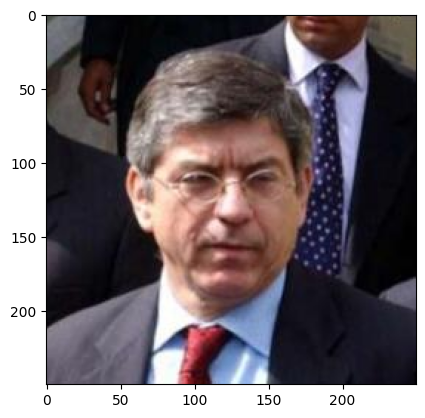

In [23]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [24]:
import insightface
from insightface.app import FaceAnalysis

In [25]:
import insightface
from insightface.app import FaceAnalysis

app = FaceAnalysis(name='buffalo_l', providers=['CPUExecutionProvider'])  # ou 'CUDAExecutionProvider' si tu as un GPU
app.prepare(ctx_id=0)

faces = app.get(img)
faces

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\romai/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\romai/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\romai/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\romai/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\romai/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

[{'bbox': array([ 72.00008,  65.94358, 170.35336, 188.40015], dtype=float32),
  'kps': array([[103.14918 , 110.74461 ],
         [147.55994 , 111.19191 ],
         [128.65085 , 135.92232 ],
         [107.832375, 157.22566 ],
         [143.57852 , 157.65288 ]], dtype=float32),
  'det_score': np.float32(0.8226123),
  'landmark_3d_68': array([[ 6.83738632e+01,  1.09000504e+02,  6.34339066e+01],
         [ 6.98814011e+01,  1.23195969e+02,  6.26532593e+01],
         [ 7.17524719e+01,  1.37736298e+02,  6.06397400e+01],
         [ 7.50669861e+01,  1.51498169e+02,  5.61540985e+01],
         [ 8.08154449e+01,  1.63926254e+02,  4.58482475e+01],
         [ 8.88942719e+01,  1.73059372e+02,  3.72243271e+01],
         [ 9.77009888e+01,  1.79774551e+02,  3.01408215e+01],
         [ 1.07684929e+02,  1.85337936e+02,  2.02197151e+01],
         [ 1.24249237e+02,  1.89870621e+02,  1.61965199e+01],
         [ 1.39410751e+02,  1.86103760e+02,  2.42663078e+01],
         [ 1.49132950e+02,  1.79981567e+02,  3.

In [26]:
type(faces[0].embedding)

numpy.ndarray

In [ ]:
len(faces)

In [ ]:
# Dessiner des rectangles autour des visages détectés
for face in faces:
    box = face.bbox.astype(int)  # [x1, y1, x2, y2]
    cv2.rectangle(img, (box[0], box[1]), (box[2], box[3]), color=(0, 255, 0), thickness=2)

# Convertir l'image en RGB pour affichage
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Affichage
plt.imshow(img_rgb)
plt.title("Visage détecté")
plt.show()

In [ ]:
box # [x1, y1, x2, y2]

In [ ]:
face = faces[0]
box = face.bbox.astype(int)  # [x1, y1, x2, y2]

# Recadrer le visage
face_crop = img[box[1]+2:box[3]-1, box[0]+2:box[2]-1]

face_crop = cv2.cvtColor(face_crop, cv2.COLOR_BGR2RGB)
plt.imshow(face_crop)

In [ ]:
############################ test ###############################

In [32]:
import onnx

model = onnx.load("../model/det_10g.onnx")

for input_tensor in model.graph.input:
    shape = input_tensor.type.tensor_type.shape
    dims = [d.dim_param if d.dim_param else d.dim_value for d in shape.dim]
    print(f"Entrée: {input_tensor.name} | Dimensions: {dims}")


Entrée: input.1 | Dimensions: [1, 3, '?', '?']


In [33]:
model.graph.input

[name: "input.1"
type {
  tensor_type {
    elem_type: 1
    shape {
      dim {
        dim_value: 1
      }
      dim {
        dim_value: 3
      }
      dim {
        dim_param: "?"
      }
      dim {
        dim_param: "?"
      }
    }
  }
}
]

In [28]:
# test : 

import onnxruntime as ort
import numpy as np
import cv2

def preprocess(image_paths):
    imgs = []
    for path in image_paths:
        img = cv2.imread(path)[:, :, ::-1]  # BGR → RGB
        img = cv2.resize(img, (192, 192)) # Redimensionnement à 112x112
        img = img.astype(np.float32) / 255.0
        img = (img - 0.5) / 0.5  # Normalisation InsightFace
        img = np.transpose(img, (2, 0, 1))  # HWC → CHW
        imgs.append(img)
    return np.stack(imgs)  # Shape: (N, 3, 112, 112)

# Charger le modèle
session = ort.InferenceSession("../model/2d106det.onnx") #("../model/w600k_r50.onnx") 
input_name = session.get_inputs()[0].name

# Traiter un batch de visages
list_img_path = ["../data/img_test/"+name for name in os.listdir("../data/img_test/")]
batch = preprocess(list_img_path)
embeddings = session.run(None, {input_name: batch})

print("Shape des embeddings :", embeddings)  # (N, 512) typiquement


Shape des embeddings : [array([[-4.63891253e-02,  7.57840633e-01, -4.05987024e-01,
        -2.66725034e-01, -4.42563534e-01,  4.06995982e-01,
        -4.02305931e-01,  4.70347345e-01, -3.51595044e-01,
         5.28965235e-01, -2.94075429e-01,  5.82970321e-01,
        -2.37461030e-01,  6.38364315e-01, -1.79015100e-01,
         6.89439893e-01, -1.16568178e-01,  7.31316090e-01,
        -4.21307176e-01, -1.96263120e-01, -4.40853029e-01,
        -1.25123069e-01, -4.62072551e-01, -5.29370382e-02,
        -4.80872691e-01,  2.18464453e-02, -4.93975520e-01,
         1.00304045e-01, -4.98422951e-01,  1.82528913e-01,
        -4.91500556e-01,  2.63616860e-01, -4.72118765e-01,
         3.38282883e-01,  4.81126457e-01, -1.18946113e-01,
         3.37689847e-01,  5.15851676e-01,  2.89371520e-01,
         5.70858061e-01,  2.36926600e-01,  6.19514048e-01,
         1.80501044e-01,  6.60422385e-01,  1.29143164e-01,
         7.00330257e-01,  7.68574700e-02,  7.32188702e-01,
         2.01058649e-02,  7.5319

In [29]:
embeddings

[array([[-4.63891253e-02,  7.57840633e-01, -4.05987024e-01,
         -2.66725034e-01, -4.42563534e-01,  4.06995982e-01,
         -4.02305931e-01,  4.70347345e-01, -3.51595044e-01,
          5.28965235e-01, -2.94075429e-01,  5.82970321e-01,
         -2.37461030e-01,  6.38364315e-01, -1.79015100e-01,
          6.89439893e-01, -1.16568178e-01,  7.31316090e-01,
         -4.21307176e-01, -1.96263120e-01, -4.40853029e-01,
         -1.25123069e-01, -4.62072551e-01, -5.29370382e-02,
         -4.80872691e-01,  2.18464453e-02, -4.93975520e-01,
          1.00304045e-01, -4.98422951e-01,  1.82528913e-01,
         -4.91500556e-01,  2.63616860e-01, -4.72118765e-01,
          3.38282883e-01,  4.81126457e-01, -1.18946113e-01,
          3.37689847e-01,  5.15851676e-01,  2.89371520e-01,
          5.70858061e-01,  2.36926600e-01,  6.19514048e-01,
          1.80501044e-01,  6.60422385e-01,  1.29143164e-01,
          7.00330257e-01,  7.68574700e-02,  7.32188702e-01,
          2.01058649e-02,  7.53198922e-0

In [7]:
import os
os.listdir("../data/img_test/")

['Cesar_Gaviria_0001.jpg', 'Chanda_Rubin_0001.jpg', 'Charles_Moose_0001.jpg']

In [21]:
session.get_inputs()[0].name

'input.1'

In [34]:
input_name

'data'

# --------------------------------------------------------------------------------

In [1]:

# read datset : 
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms


# emb :
import onnxruntime as ort
import numpy as np
import cv2


In [ ]:
# # 1. Charger les images et extraire les embeddings

# def extract_embeddings(image_dir : str):
#     # image_dir = "/chemin/vers/images"
#     embeddings = []
#     image_paths = []
    
#     for root, dirs, files in os.walk(image_dir) :

#         #################### temp #########################
#         # files = files[:1000]
#         ###################################################
        
#         for file in files:
#             if file.lower().endswith((".jpg", ".jpeg", ".png")):
#                 img_path = os.path.join(root, file)
#                 img = cv2.imread(img_path)
#                 if img is None:
#                     continue
#                 faces = app.get(img)
#                 if len(faces) > 0:
#                     emb = faces[0].embedding  # emb = vecteur 512D
#                     emb = emb / np.linalg.norm(emb) # normaliser l'embedding (norm-L2)
#                     embeddings.append(emb)
#                     image_paths.append(img_path)
    
#     embeddings = np.array(embeddings)
#     print(f"{len(embeddings)} embeddings extraits.")

#     return embeddings, image_paths

In [ ]:
# image_dir = f"../data/lfw_train"
# list_embeddings, list_image_paths = extract_embeddings(image_dir)

In [8]:
import onnxruntime as ort

session = ort.InferenceSession("../model/det_10g.onnx", providers=["CPUExecutionProvider"])  # ou "CUDAExecutionProvider"
input_name = session.get_inputs()[0].name

In [14]:
image = Image.open("../data/img_test/Cesar_Gaviria_0001.jpg").convert('RGB')

# Prétraitement de l'image
image = image.resize((192, 192))  # Redimensionnement à 192x192
image_np = np.array(image).astype(np.float32) / 255.0  # Normalisation entre 0 et 1
image_np = (image_np - 0.5) / 0.5  # Normalisation InsightFace
image_np = np.transpose(image_np, (2, 0, 1))  # HWC → CHW
image_np = np.expand_dims(image_np, axis=0)  # Ajouter une dimension pour le batch     
# batch_np = batch.numpy().astype(np.float32)  # conversion vers numpy float32

# Inférence par batch complet sur le GPU
emb = session.run(None, {input_name: image_np})#[0]  # shape (B, 512)
emb

[array([[0.02716705],
        [0.04021296],
        [0.01183167],
        ...,
        [0.00491282],
        [0.01292434],
        [0.01338622]], shape=(1152, 1), dtype=float32),
 array([[0.04027784],
        [0.03386757],
        [0.02940977],
        [0.01970345],
        [0.02647677],
        [0.01665112],
        [0.02090383],
        [0.01507512],
        [0.01666749],
        [0.01170871],
        [0.01498711],
        [0.01043043],
        [0.01500338],
        [0.01038468],
        [0.01712611],
        [0.01269272],
        [0.04106191],
        [0.01906288],
        [0.06770119],
        [0.02711427],
        [0.05677664],
        [0.02570435],
        [0.04939029],
        [0.03583831],
        [0.03035253],
        [0.02161133],
        [0.03299507],
        [0.01831618],
        [0.0352855 ],
        [0.01872152],
        [0.02758715],
        [0.01703745],
        [0.01805392],
        [0.01097253],
        [0.01297984],
        [0.00856882],
        [0.01102206],
       

In [31]:
len(emb[0])

1152

In [28]:
emb[1]

array([[0.04027784],
       [0.03386757],
       [0.02940977],
       [0.01970345],
       [0.02647677],
       [0.01665112],
       [0.02090383],
       [0.01507512],
       [0.01666749],
       [0.01170871],
       [0.01498711],
       [0.01043043],
       [0.01500338],
       [0.01038468],
       [0.01712611],
       [0.01269272],
       [0.04106191],
       [0.01906288],
       [0.06770119],
       [0.02711427],
       [0.05677664],
       [0.02570435],
       [0.04939029],
       [0.03583831],
       [0.03035253],
       [0.02161133],
       [0.03299507],
       [0.01831618],
       [0.0352855 ],
       [0.01872152],
       [0.02758715],
       [0.01703745],
       [0.01805392],
       [0.01097253],
       [0.01297984],
       [0.00856882],
       [0.01102206],
       [0.00829694],
       [0.0134494 ],
       [0.00973973],
       [0.0235765 ],
       [0.01329115],
       [0.03982744],
       [0.01707703],
       [0.03115034],
       [0.01504791],
       [0.02985311],
       [0.018

In [66]:
import onnxruntime as ort
import numpy as np
from PIL import Image, ImageDraw

# === Paramètres ===
img_path = "../data/img_test/Cesar_Gaviria_0001.jpg"
output_path = "image_encadree.jpg"
model_path = "../model/det_10g.onnx"
threshold = 0.8

# === Image originale
image_orig = Image.open(img_path).convert('RGB')
w, h = image_orig.size  # Ex: (250, 250)
image_resized = image_orig.resize((192, 192))

# === Prétraitement
img_np = np.array(image_resized).astype(np.float32) / 255.0
img_np = (img_np - 0.5) / 0.5
img_np = np.transpose(img_np, (2, 0, 1))[None]

# === Modèle ONNX
session = ort.InferenceSession(model_path)
input_name = session.get_inputs()[0].name
outputs = session.run(None, {input_name: img_np})

# === Scores & boxes (normalisés entre 0 et 1)
scores = outputs[1].squeeze()     # (288,)
boxes = outputs[4].squeeze()      # (288, 4)

valid_idx = np.where(scores > threshold)[0]
valid_boxes = boxes[valid_idx]


# === Boîtes reprojetées dans l’image originale
image_draw = image_orig.copy()
draw = ImageDraw.Draw(image_draw)

for box in valid_boxes:
    x1, y1, x2, y2 = map(float, box)
    if x2 > x1 and y2 > y1:
        x1 *= w
        x2 *= w
        y1 *= h
        y2 *= h
        draw.rectangle([x1, y1, x2, y2], outline="red", width=3)

# === Sauvegarde
image_draw.save(output_path)
print(f"✅ Image avec visages encadrés : {output_path}")


✅ Image avec visages encadrés : image_encadree.jpg


In [67]:
valid_boxes

array([[2.541558 , 2.6195283, 2.1852365, 2.9980903]], dtype=float32)

In [63]:
image_draw.show()

In [54]:
valid_boxes[:3]

array([[0.9294169, 1.035042 , 0.7913703, 1.0381885]], dtype=float32)

In [55]:
for i, output in enumerate(outputs):
    print(f"Output {i} : shape={output.shape}")


Output 0 : shape=(1152, 1)
Output 1 : shape=(288, 1)
Output 2 : shape=(72, 1)
Output 3 : shape=(1152, 4)
Output 4 : shape=(288, 4)
Output 5 : shape=(72, 4)
Output 6 : shape=(1152, 10)
Output 7 : shape=(288, 10)
Output 8 : shape=(72, 10)


In [ ]:
class MonDataset(Dataset):
    def __init__(self, dossier_images):
        self.chemins = [os.path.join(dossier_images, f)
                        for f in os.listdir(dossier_images)
                        if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff'))]
        
        self.transform = transforms.Compose([
                        transforms.Resize((112, 112)),
                        transforms.ToTensor(),  # (C, H, W), float32 in [0, 1]
                        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # [-1, 1] as expected by InsightFace
                    ])
    
    def __len__(self):
        return len(self.chemins)
    
    def __getitem__(self, idx):
        image = Image.open(self.chemins[idx]).convert('RGB')  # Convertit en RGB pour uniformité
        return self.transform(image)



In [21]:
# Utilisation
dataset = MonDataset('../data/img_test')
loader = DataLoader(dataset, batch_size=4, shuffle=False)

In [22]:
for b in loader:
    print(b.shape)  # Affiche la forme du batch (N, C, H, W)

torch.Size([4, 3, 112, 112])


In [23]:
import onnxruntime as ort

session = ort.InferenceSession("../model/w600k_r50.onnx", providers=["CPUExecutionProvider"])  # ou "CUDAExecutionProvider"
input_name = session.get_inputs()[0].name


In [24]:
embeddings = []

# On suppose que ton loader est déjà défini avec le bon Dataset et les bonnes transformations
for batch in loader:
    # batch : shape (B, 3, 112, 112), type torch.Tensor
    batch_np = batch.numpy().astype(np.float32)  # conversion vers numpy float32

    # Inférence par batch complet sur le GPU
    emb = session.run(None, {input_name: batch_np})[0]  # shape (B, 512)
    embeddings.append(emb)

# Concaténation finale
embeddings = np.vstack(embeddings)  # shape (N, 512)
print(f"Embeddings shape : {embeddings.shape}")

Embeddings shape : (4, 512)


In [25]:
embeddings

array([[-0.04746262, -0.81847167, -0.40201288, ..., -0.16025235,
        -0.3350296 ,  1.2244375 ],
       [-0.04406853,  1.9785336 , -1.0866795 , ..., -0.2931704 ,
         0.71049213,  0.41719836],
       [ 0.77424884,  1.5184189 , -0.26320717, ...,  0.7240531 ,
         1.36318   ,  0.50296867],
       [-0.45019934,  0.23602243, -0.6902319 , ...,  0.46435595,
        -0.15830904, -0.4602128 ]], shape=(4, 512), dtype=float32)

In [ ]:
#########################################################

In [74]:
class FaceDataset(Dataset) : 
    def __init__(self, img_folder) :
        self.list_img_path = os.listdir(img_folder)
        
    def __len__(self) :
        return len(self.list_img_path)
    
    def __getitem__(self, idx):
        return self.list_img_path[idx]
        


In [75]:
img_folder = f"../data/img_test/"
dataset = FaceDataset(img_folder=img_folder)

In [76]:
dataset.__getitem__(3)

'Christine_Todd_Whitman_0001.jpg'

In [79]:
data_loader = DataLoader(dataset, batch_size=2)

In [80]:
for i in data_loader :
    print(i)

['Cesar_Gaviria_0001.jpg', 'Chanda_Rubin_0001.jpg']
['Charles_Moose_0001.jpg', 'Christine_Todd_Whitman_0001.jpg']


In [ ]:
################################################################

In [ ]:
import onnxruntime as ort
import numpy as np
from PIL import Image, ImageDraw

# === Paramètres ===
img_path = "../data/img_test/Cesar_Gaviria_0001.jpg"
output_path = "image_encadree.jpg"
model_path = "../model/det_10g.onnx"
threshold = 0.8

# === Image originale
image_orig = Image.open(img_path).convert('RGB')
w, h = image_orig.size  # Ex: (250, 250)
image_resized = image_orig.resize((192, 192))

# === Prétraitement
img_np = np.array(image_resized).astype(np.float32) / 255.0
img_np = (img_np - 0.5) / 0.5
img_np = np.transpose(img_np, (2, 0, 1))[None]

# === Modèle ONNX
session = ort.InferenceSession(model_path)
input_name = session.get_inputs()[0].name
outputs = session.run(None, {input_name: img_np})

# === Scores & boxes (normalisés entre 0 et 1)
scores = outputs[1].squeeze()     # (288,)
boxes = outputs[4].squeeze()      # (288, 4)

valid_idx = np.where(scores > threshold)[0]
valid_boxes = boxes[valid_idx]


valid_boxes


array([-4.66015860e-02,  7.58868694e-01, -4.06785041e-01, -2.68032014e-01,
       -4.43744004e-01,  4.07517076e-01, -4.03384000e-01,  4.70997155e-01,
       -3.52542222e-01,  5.29702306e-01, -2.94865072e-01,  5.83771229e-01,
       -2.38107592e-01,  6.39222801e-01, -1.79528147e-01,  6.90353274e-01,
       -1.16944022e-01,  7.32285798e-01, -4.22175407e-01, -1.97373688e-01,
       -4.41810280e-01, -1.26039743e-01, -4.63120967e-01, -5.36537245e-02,
       -4.82014030e-01,  2.13279724e-02, -4.95187670e-01,  1.00003213e-01,
       -4.99676019e-01,  1.82461888e-01, -4.92774457e-01,  2.63778687e-01,
       -4.73365426e-01,  3.38641882e-01,  4.82476771e-01, -1.19419113e-01,
        3.38322490e-01,  5.16825378e-01,  2.89867908e-01,  5.71927249e-01,
        2.37283796e-01,  6.20636225e-01,  1.80717066e-01,  6.61544204e-01,
        1.29263267e-01,  7.01439202e-01,  7.68931136e-02,  7.33274400e-01,
        2.00369395e-02,  7.54260302e-01,  4.78400439e-01, -4.86120321e-02,
        4.77146417e-01,  

In [4]:
len(scores)

212

In [73]:
import insightface
from insightface.app import FaceAnalysis

app = FaceAnalysis(name='buffalo_l', providers=['CUDAExecutionProvider'])  # 'CPUExecutionProvider' ou 'CUDAExecutionProvider' si tu as un GPU
app.prepare(ctx_id=0) 

img = cv2.imread(img_path)
faces = app.get(img)


c:\Users\romai\Bureau\DATA_SCIENCE\PROJET_perso\03_CV_project\Backend\cv_env\Lib\site-packages\albumentations\__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
c:\Users\romai\Bureau\DATA_SCIENCE\PROJET_perso\03_CV_project\Backend\cv_env\Lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:118: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\romai/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\romai/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\romai/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\romai/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\romai/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

In [76]:
faces[0]["bbox"]

array([ 72.00008,  65.94358, 170.35336, 188.40015], dtype=float32)